# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
#Obtaining a subset for the relevant dataset for this analysis
df = data[['race','call']]

In [6]:
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


    1. What test is appropriate for this problem? Does CLT apply?

Since, we have large sample size (>30) we will use z-test. CLT should apply since the sample size is large and we can check if the samples are normally distributed using bootstrap method.

In [7]:
#generating bootstrap replicates
def sample_count(data, func,size=1):
    
    bs_rep = np.empty(size)
    
    for i in range(size):
        #generating bootstrap samples and applying function on the samples
        bs_sample = np.random.choice(data, len(data))
        bs_rep[i] = func(bs_sample)
    return bs_rep

In [8]:
#Selecting a dataframe with race 'b'
df_b = df[df.race=='b']

In [15]:
#Getting bootstrap replicates that count number of callbacks
df_b_count = sample_count(df_b.call, np.sum, 10000 )

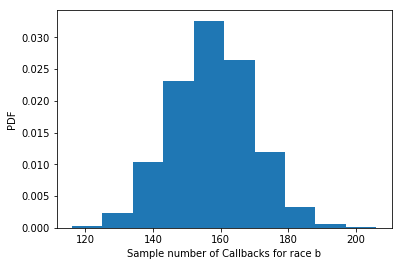

In [16]:
#Plotting histogram for bootstrap replicates of number of callbacks for race 'b'
_ =plt.hist(df_b_count, bins=10, normed=True)
_ = plt.xlabel('Sample number of Callbacks for race b')
_ = plt.ylabel('PDF')

In [17]:
chi, p = stats.normaltest(df_b_count)
print(chi,p)

2.03082812736 0.362252403211


In [18]:
alpha = 0.05

In [19]:
if p <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05')
else:
    print('We cannot reject the null hypothesis at alpha = 0.05')

We cannot reject the null hypothesis at alpha = 0.05


The p value greater than alpha suggest that the bootstrap replicates of number of callbacks for race 'b' are normally distributed

In [20]:
#Selecting a dataframe with race 'w'
df_w = df[df.race=='w']

In [24]:
#Getting bootstrap replicates that count number of callbacks
df_w_count = sample_count(df_w.call, np.sum, 10000)

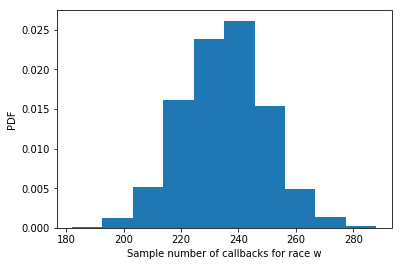

In [25]:
#Plotting histogram for bootstrap replicates of number of callbacks for race 'w'
_ = plt.hist(df_w_count, bins=10, normed=True)
_ = plt.xlabel('Sample number of callbacks for race w')
_ = plt.ylabel('PDF')

In [26]:
chi1, p1 = stats.normaltest(df_w_count)
print(chi1, p1)

4.73327312374 0.0937956722712


The histogram and p-value greater than alpha(0.05) suggest that we cannot reject null hypotheis. So, we can assume bootstrap replicates of number of callbacks for race 'w' are normally distributed.

     2. What are the null and alternate hypotheses?

Null hypotheses: The number of callbacks for both races are equal

Alternate hypotheses: The number of callbacks for both races are not equal

    3. Compute margin of error, confidence interval, and p-value.

In [27]:
#estimating margin of error for boot strap replicates for race 'b' 
z_ppf = stats.norm.ppf(1-(alpha/2))
margin_error_b = z_ppf * df_b_count.std()/np.sqrt(len(df_b_count))

print('The margin of error for alpha = 0.05 is ' + str(margin_error_b))

The margin of error for alpha = 0.05 is 0.234758984024


In [28]:
#estimating 95% confidence interval for boot strap replicates for race 'b' 
conf_int = np.percentile (df_b_count, [2.5, 97.5])
print ('The 95% confidence interval for number of call for race b is ' + str(conf_int[0]) +' and ' + str(conf_int[1]))

The 95% confidence interval for number of call for race b is 134.0 and 181.0


In [29]:
#estimating margin of error for boot strap replicates for race 'w'
z_ppf1 = stats.norm.ppf(1-(alpha/2))
margin_error_w = z_ppf1 * df_w_count.std()/np.sqrt(len(df_w_count))

print('The margin of error for alpha = 0.05 is ' + str(margin_error_w))

The margin of error for alpha = 0.05 is 0.285784289987


In [30]:
#estimating 95% confidence interval for boot starp replicates for race 'w' 
conf_int = np.percentile (df_w_count, [2.5, 97.5])
print ('The 95% confidence interval for number of callbacks for race w is ' + str(conf_int[0]) +' and ' + str(conf_int[1]))

The 95% confidence interval for number of callbacks for race w is 206.0 and 264.0


In [31]:
#estimating empirical difference
emp_diff = np.sum(df_w.call) - np.sum(df_b.call)
print(emp_diff)

78.0


We will use bootstrap method to check the null hypotheses

In [32]:
#calculating observed number of callbacks for whole dataset
obs_callbacks = np.sum(df.call)

In [35]:
#getting bootstrap replicates of the number of callbacks
df_b_cb = sample_count(df_b.call, np.sum, 10000)
df_w_cb = sample_count(df_w.call, np.sum, 10000)

#difference of bootstrap replicates
df_cb_diff = df_w_cb - df_b_cb

#estimating p-value
p_diff = np.sum(df_cb_diff >= emp_diff)/len(df_cb_diff)

In [36]:
if p_diff <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =' + str(p_diff))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =' + str(p_diff))

We cannot reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =0.5087


       4. Write a story describing the statistical significance in the context or the original problem.
       5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis showed that the number of callbacks for group with race 'w' is not significantly different from groub 'b'  for an alpha value of 0.05. 

Although, the analysis suggests that race is not one of the factors in callback success, we should further consider other variables to check which is most important.